In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import pickle
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, ShuffleSplit, LeaveOneOut, GroupKFold
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
!pip install xgboost
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA

### Import and understand the data.

In [2]:
df = pd.read_csv('signal-data.csv')

In [3]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


### Print 5 point summary and share at least 2 observations

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


### Observations:
1. There are some features with missing values as indicated by the count being less than the total number of datapoints. The first feature has a relatively high mean value of 3014.45 with a small standard deviation of 73.62, indicating that the data points are tightly clustered around the mean. The range between the 25th percentile (2966.26) and the 75th percentile (3056.65) is relatively small, suggesting that there may not be significant variations in this feature.

2. The second feature has a lower mean value of 2495.85 compared to the first feature. The standard deviation is relatively higher at 80.41, indicating a wider spread of data points. The range between the 25th percentile (2452.25) and the 75th percentile (2538.82) is also larger than the first feature, suggesting a wider distribution.

3. The third feature has a lower mean value of 2200.55 with a small standard deviation of 29.51. The range between the 25th percentile (2181.04) and the 75th percentile (2218.06) is relatively narrow, indicating a relatively small spread of data points. This feature seems to have less variability compared to the previous two features.

4. The fourth feature has a mean value of 1396.38 with a relatively high standard deviation of 441.69. The minimum value is 0, indicating the presence of zero values in the dataset. The range between the 25th percentile (1081.88) and the 75th percentile (1591.22) is wide, suggesting a significant spread of data points. This feature may have some outliers or extreme values.

5. The fifth feature has a mean value of 4.20 with a relatively small standard deviation of 56.36. The minimum value is 0.6815, indicating that the data points in this feature are positively skewed. The 75th percentile (1.53) is much smaller than the maximum value (1114.54), indicating the presence of outliers or extreme values.

# Data cleansing:

### Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

In [5]:
null_threshold = len(df) * 0.2
numeric_columns = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    null_count = df[column].isnull().sum()
    if null_count / len(df) >= 0.2:
        df = df.drop(column, axis=1)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

In [6]:
null_count = df.isnull().sum().sum()
if null_count == 0:
    print("No null values remaining in the DataFrame")
else:
    print("Null values still present in the DataFrame")

No null values remaining in the DataFrame


### Identify and drop the features which are having same value for all the rows.

In [7]:
same_value_columns = []
for column in df.columns:
    if df[column].nunique() == 1:
        same_value_columns.append(column)

df.drop(same_value_columns, axis=1, inplace=True)

In [8]:
df.head()

,Time,0,1,2,3,4,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


In [9]:
df.shape

(1567, 444)

In [10]:
df = df.drop(columns = ['Time'], axis = 1)

### Drop other features if required using relevant functional knowledge. Clearly justify the same.

We can remove the features with standard deviation of 0, indicating that these columns have constant values and do not provide any useful information for modeling or analysis. By dropping such columns, it helps to reduce noise and improve the efficiency of the subsequent steps.

In [11]:
cols = df.select_dtypes([np.number]).columns
std = df[cols].std()
cols_to_drop = std[std==0].index
df.drop(cols_to_drop, axis=1,inplace=True)

We can also drop columns from a DataFrame that have low variance below a specified threshold (0.1). Columns with low variance indicate that the values in those columns do not vary much and may not contribute significantly to the analysis.

In [12]:
threshold = 0.1  

variances = df.var()
low_variance_features = variances[variances < threshold].index
df.drop(columns=low_variance_features, inplace=True)

In [13]:
df.shape

(1567, 255)

### Check for multi-collinearity in the data and take necessary action.

In [14]:
correlation_matrix = df.corr()

highly_correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

df.drop(columns=highly_correlated_features, inplace=True)

In [15]:
df.shape

(1567, 140)

### Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

#### We have handled missing values in a DataFrame for numeric columns. This approach helps handle missing values in the data while considering the threshold for retaining or removing columns based on the amount of missingness.
#### Columns with the same value in all rows will be dropped from the DataFrame. This step helps to eliminate features that do not provide any variation and have no impact on the analysis or modeling process.
#### Columns that are highly correlated with each other (with an absolute correlation value greater than 0.8) will be dropped from the DataFrame. This helps to address multicollinearity and improve the independence of features in the dataset.

## Data analysis & visualisation:

### Perform a detailed univariate Analysis with appropriate detailed comments after each analysis

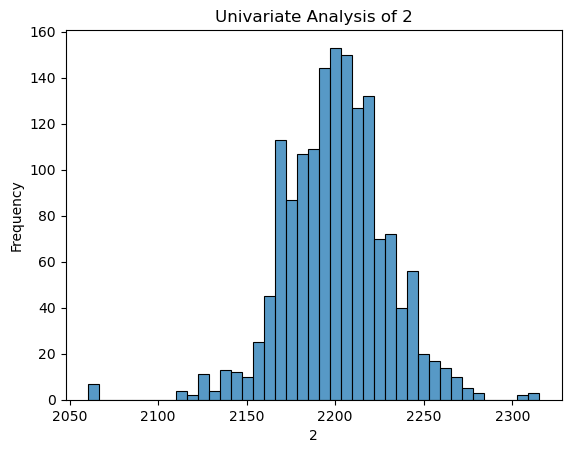

Descriptive Statistics for 2:
count    1567.000000
mean     2200.547318
std        29.380932
min      2060.660000
25%      2181.099950
50%      2200.955600
75%      2218.055500
max      2315.266700
Name: 2, dtype: float64



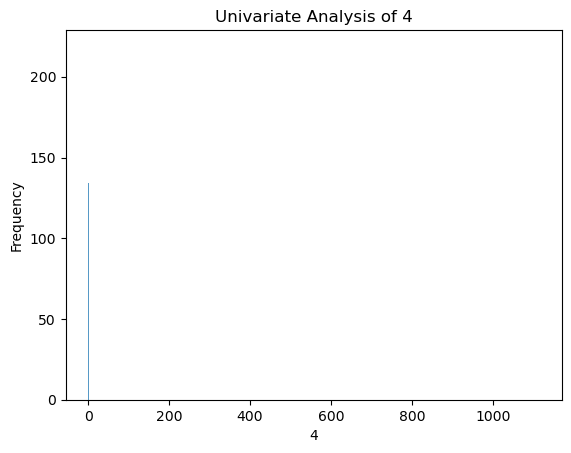

Descriptive Statistics for 4:
count    1567.000000
mean        4.197013
std        56.103066
min         0.681500
25%         1.017700
50%         1.317100
75%         1.529600
max      1114.536600
Name: 4, dtype: float64



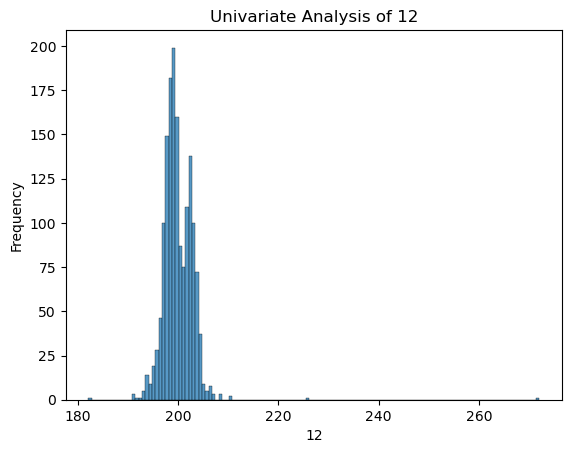

Descriptive Statistics for 12:
count    1567.000000
mean      199.956809
std         3.255195
min       182.094000
25%       198.130950
50%       199.537100
75%       202.006750
max       272.045100
Name: 12, dtype: float64



In [16]:
variables = ['2', '4', '12']

for var in variables:
    sns.histplot(df[var])
    plt.title(f'Univariate Analysis of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

    stats = df[var].describe()
    print(f"Descriptive Statistics for {var}:")
    print(stats)
    print()

### Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

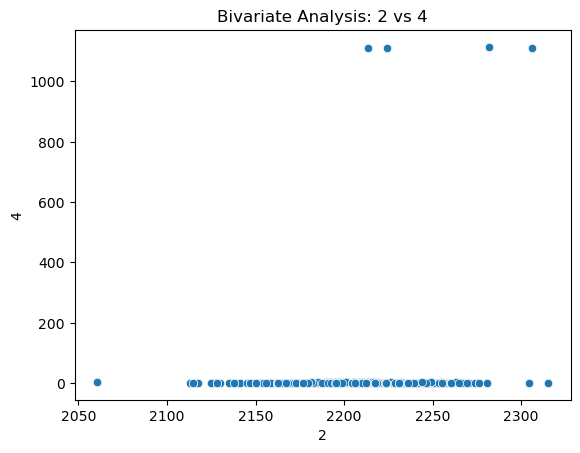

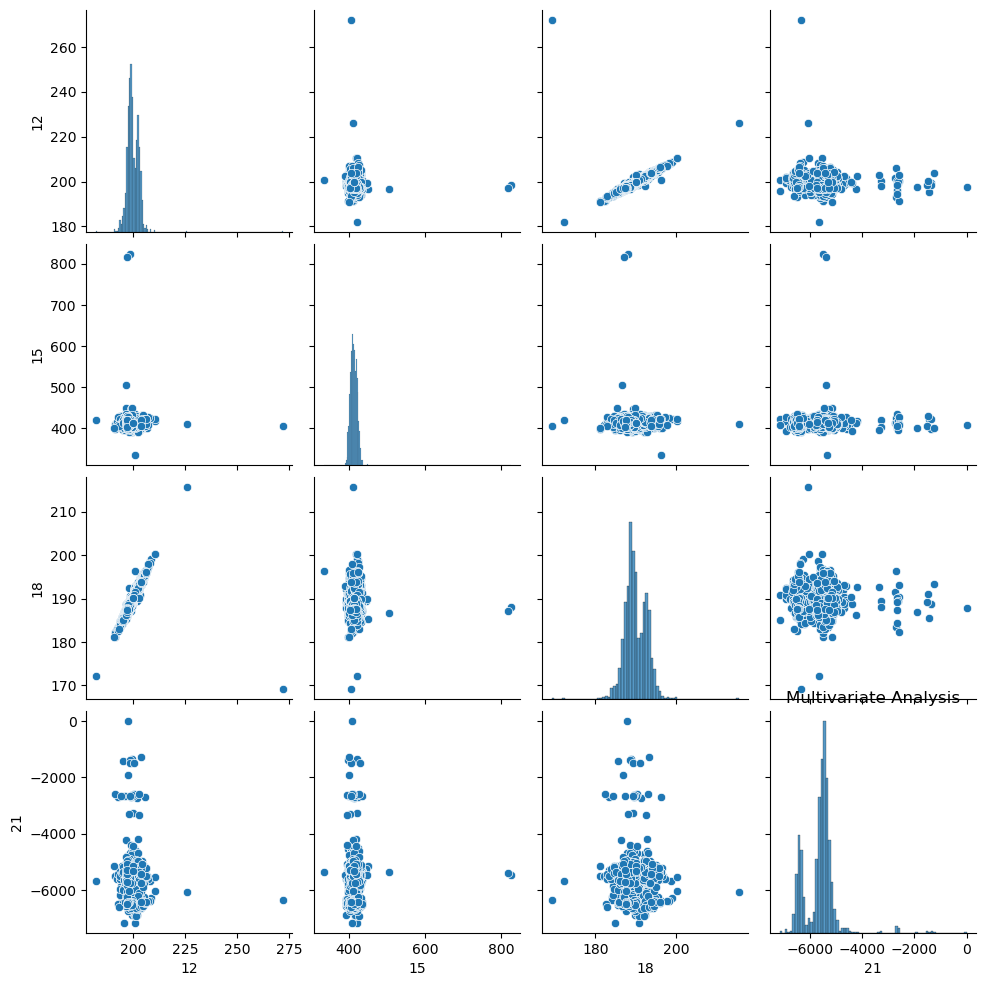

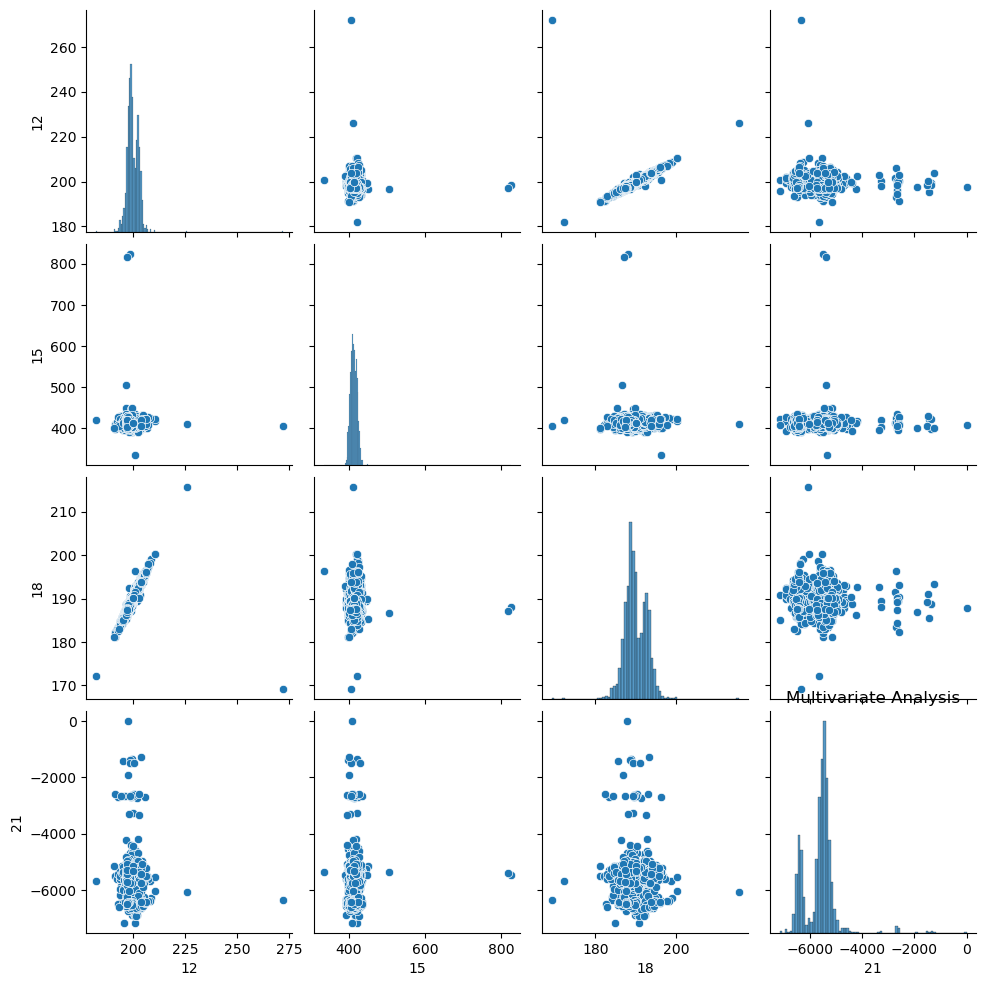

In [17]:
# Select the variables for bivariate analysis
variable1 = '2'
variable2 = '4'

# Bivariate analysis: Scatter plot
sns.scatterplot(x=variable1, y=variable2, data=df)
plt.title('Bivariate Analysis: 2 vs 4')
plt.xlabel('2')
plt.ylabel('4')
variables = ['12', '15', '18', '21']

sns.pairplot(df[variables])
plt.title('Multivariate Analysis')
plt.show()
plt.show()
variables = ['12', '15', '18', '21']

sns.pairplot(df[variables])
plt.title('Multivariate Analysis')
plt.show()

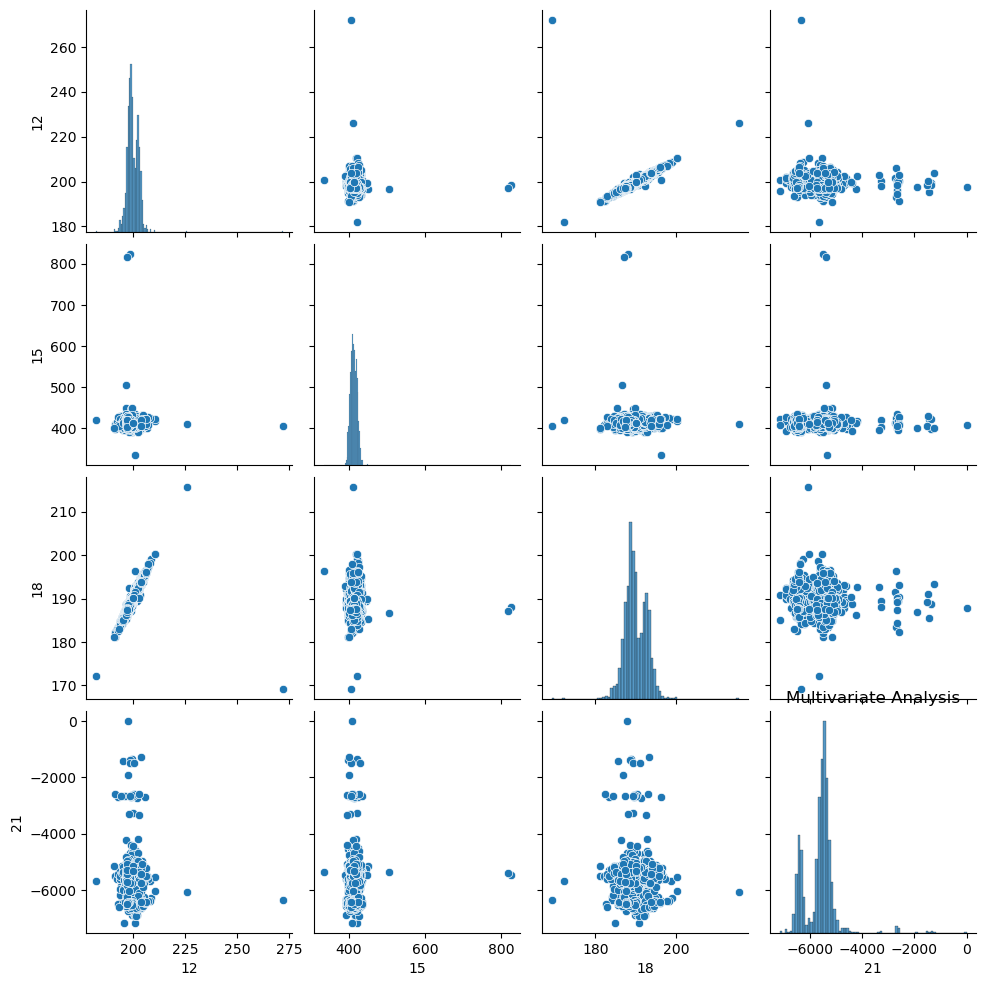

In [18]:
variables = ['12', '15', '18', '21']

sns.pairplot(df[variables])
plt.title('Multivariate Analysis')
plt.show()

## Data pre-processing:

### Segregate predictors vs target attributes.

In [19]:
X = df.drop('Pass/Fail', axis=1)  
y = df['Pass/Fail']  

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1567, 139)
Shape of y: (1567,)


In [20]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Check for target balancing and fix it if found imbalanced.

-1    1463
 1     104
Name: Pass/Fail, dtype: int64


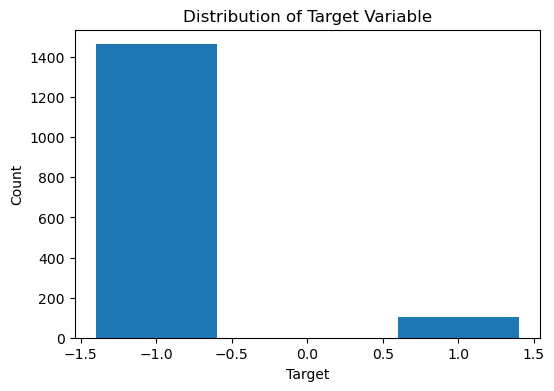

In [21]:
# Check the distribution of the target variable
target_counts = df['Pass/Fail'].value_counts()
print(target_counts)

# Visualize the distribution
plt.figure(figsize=(6, 4))
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

-1    1463
 1    1463
Name: Pass/Fail, dtype: int64


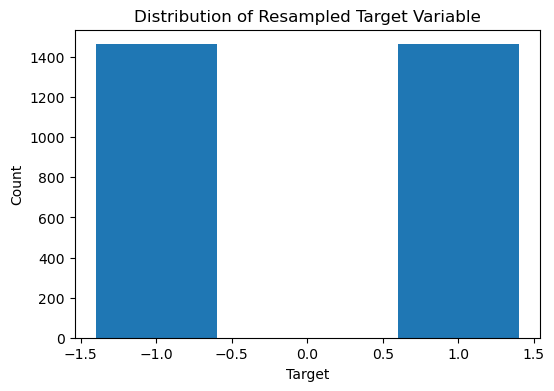

In [22]:
oversampler = RandomOverSampler(random_state=42)

    # Resample the data to handle class imbalance

X_resampled, y_resampled = oversampler.fit_resample(X, y)

    # Check the distribution of the resampled target variable

resampled_target_counts = pd.Series(y_resampled).value_counts()

print(resampled_target_counts)

    # Visualize the balanced distribution

plt.figure(figsize=(6, 4))
plt.bar(resampled_target_counts.index, resampled_target_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Resampled Target Variable')
plt.show()

### Perform train-test split and standardise the data or vice versa if required.

In [23]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
print("Original DataFrame shape:", df.shape)
print("Train DataFrame shape:", X_train.shape)
print("Test DataFrame shape:", X_test.shape)

Original DataFrame shape: (1567, 140)
Train DataFrame shape: (1096, 139)
Test DataFrame shape: (471, 139)


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1567.0,3014.452896,73.480613,2743.2400,2966.66500,3011.8400,3056.54000,3356.3500
1,1567.0,2495.850231,80.227793,2158.7500,2452.88500,2498.9100,2538.74500,2846.4400
2,1567.0,2200.547318,29.380932,2060.6600,2181.09995,2200.9556,2218.05550,2315.2667
3,1567.0,1396.376627,439.712852,0.0000,1083.88580,1287.3538,1590.16990,3715.0417
4,1567.0,4.197013,56.103066,0.6815,1.01770,1.3171,1.52960,1114.5366
...,...,...,...,...,...,...,...,...
570,1567.0,530.523623,17.499736,317.1964,530.70270,532.3982,534.35640,589.5082
572,1567.0,28.450165,86.304681,3.5400,7.50000,8.6500,10.13000,454.5600
585,1567.0,3.067826,3.576891,1.1975,2.30650,2.7577,3.29495,99.3032
589,1567.0,99.670066,93.861936,0.0000,44.36860,72.0230,114.74970,737.3048


In [26]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1567.0,3014.452896,73.480613,2743.2400,2966.66500,3011.8400,3056.54000,3356.3500
1,1567.0,2495.850231,80.227793,2158.7500,2452.88500,2498.9100,2538.74500,2846.4400
2,1567.0,2200.547318,29.380932,2060.6600,2181.09995,2200.9556,2218.05550,2315.2667
3,1567.0,1396.376627,439.712852,0.0000,1083.88580,1287.3538,1590.16990,3715.0417
4,1567.0,4.197013,56.103066,0.6815,1.01770,1.3171,1.52960,1114.5366
...,...,...,...,...,...,...,...,...
569,1567.0,21.117674,9.280454,3.2504,15.46620,20.1824,23.03520,84.8024
570,1567.0,530.523623,17.499736,317.1964,530.70270,532.3982,534.35640,589.5082
572,1567.0,28.450165,86.304681,3.5400,7.50000,8.6500,10.13000,454.5600
585,1567.0,3.067826,3.576891,1.1975,2.30650,2.7577,3.29495,99.3032


In [27]:
X_resampled.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2926.0,3010.252426,81.223096,2743.2400,2955.827500,2999.075000,3054.3000,3356.3500
1,2926.0,2496.832240,75.314349,2158.7500,2457.420000,2499.720000,2536.4800,2846.4400
2,2926.0,2199.631248,30.562777,2060.6600,2177.066650,2197.644400,2217.3777,2315.2667
3,2926.0,1368.424613,397.440471,0.0000,1068.452100,1275.779300,1564.6023,3715.0417
4,2926.0,2.845461,41.076806,0.6815,1.030400,1.310100,1.5138,1114.5366
...,...,...,...,...,...,...,...,...
569,2926.0,21.778897,10.375941,3.2504,15.466200,21.117674,23.9308,84.8024
570,2926.0,530.615540,18.510637,317.1964,530.881800,532.265000,534.4918,589.5082
572,2926.0,23.445658,73.515634,3.5400,7.390000,8.650000,10.1500,454.5600
585,2926.0,3.117274,2.798091,1.1975,2.290425,2.762450,3.3593,99.3032


In [28]:
y_resampled.describe().T

count    2926.000000
mean        0.000000
std         1.000171
min        -1.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Pass/Fail, dtype: float64

#### Observations:
The Statistical characteristics for original and train are nearly similar but it varies with test data

## Model training, testing and tuning:

### Logistic Regression

In [29]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

### Use cross validation techniques.

In [30]:
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.88181818 0.9086758  0.91324201 0.91324201 0.8630137 ]
Mean CV Score: 0.8959983395599833


In [31]:
leave_one_out = LeaveOneOut()
leave_one_out_scores = cross_val_score(lr_model, X, y, cv=leave_one_out)

print("Leave-One-Out Scores:", leave_one_out_scores)

Leave-One-Out Scores: [1. 1. 0. ... 1. 1. 1.]


In [32]:
param_grid = [{'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 'C' : [1,2,4], 'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'], 'max_iter' : [100, 1000,2500, 5000]}]

gridsearch = GridSearchCV(lr_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy', return_train_score=True)
gridsearch.fit(X_train, y_train)
print('best score of Grid Search over 120 iterations:', gridsearch.best_score_)

best score of Grid Search over 120 iterations: 0.9224467899293859


In [33]:
randomized_search = RandomizedSearchCV(estimator=lr_model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train, y_train)
print(randomized_search.best_params_)
print('best score of randomized_search:', randomized_search.best_score_)

{'solver': 'saga', 'penalty': 'l2', 'max_iter': 100, 'C': 1}
best score of randomized_search: 0.922453300124533


In [34]:
best_score = randomized_search.best_score_
print("Best Accuracy Score:", best_score)

Best Accuracy Score: 0.922453300124533


In [35]:
# Import necessary libraries
from itertools import product

# Define the list of hyperparameters
penalty = ['l1', 'l2', 'elasticnet', 'none']
C = [1, 2, 4]
solver = ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
max_iter = [100, 1000, 2500, 5000]

# Generate all possible combinations of hyperparameters
hyperparameter_combinations = list(product(penalty, C, solver, max_iter))

# Print the total number of hyperparameter combinations
print("Total Hyperparameter Combinations:", len(hyperparameter_combinations))

Total Hyperparameter Combinations: 240


In [36]:
best_params = gridsearch.best_params_
best_score = gridsearch.best_score_
print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy Score: 0.9224467899293859


In [37]:
best_lr_model = LogisticRegression(**best_params)
best_lr_model.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='saga')

In [38]:
y_pred = best_lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9256900212314225


In [39]:
best_params = randomized_search.best_params_
best_lr_model = LogisticRegression(**best_params)
best_lr_model.fit(X_train, y_train)
y_pred = best_lr_model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.921443736730361
Precision: 0.125
Recall: 0.03225806451612903
F1-score: 0.05128205128205128


### Use any other technique/method which can enhance the model performance.

In [41]:
#Scaling the data before applying PCA
from scipy.stats import zscore
df_new=df.iloc[:,:306].apply(zscore)
df_new.head()

,0,1,2,3,4,6,12,14,15,16,...,551,561,562,564,569,570,572,585,589,Pass/Fail
0,0.224309,0.849725,-0.436273,0.033555,-0.050580,-0.563790,0.762960,-0.375783,0.103782,0.056522,...,-0.362715,0.531334,-8.200826e-14,-3.452799e-14,-9.956414e-15,0.190142,-0.226018,-0.197113,-1.665950e-15,-0.266621
1,1.107136,-0.382910,1.017137,0.153067,-0.060045,0.198217,0.181365,0.411536,0.095858,-0.269787,...,0.079904,-0.745572,-8.200826e-14,-3.452799e-14,-9.956414e-15,0.256816,-0.261137,0.385059,1.156689e+00,-0.266621
2,-1.114158,0.799102,-0.481289,0.686213,-0.047906,-0.906210,0.633372,0.182716,0.210561,-0.247086,...,-0.306382,-0.396160,6.253138e-01,-2.234265e+00,5.144841e+00,0.257279,-0.199823,0.029833,-1.791486e-01,3.750641
3,-0.350312,-0.198875,-0.051547,-1.106948,-0.051290,0.503246,0.581223,0.214760,0.535107,-0.089638,...,30.660852,1.602627,7.932446e-01,3.657665e-01,4.223799e-01,0.002548,-0.221613,-0.283417,-2.752459e-01,-0.266621
4,0.242143,0.087526,1.117387,-0.158919,-0.047492,-0.115382,0.610171,0.558796,0.436445,0.179564,...,0.602999,-0.538287,-8.200826e-14,-3.452799e-14,-9.956414e-15,0.085279,-0.227409,26.913347,-2.752459e-01,-0.266621


In [42]:
df_new.isnull().any().any()

False

In [43]:
x = df_new.iloc[:,:306]
y = df["Pass/Fail"]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 140)
shape of y: (1567,)


In [44]:
# Step 1 - Create covariance matrix

cov_matrix = np.cov(x.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00063857e+00 -1.43931658e-01  4.75868246e-03 ...  2.36043864e-02
   4.17663212e-03 -2.51570989e-02]
 [-1.43931658e-01  1.00063857e+00  5.77088798e-03 ...  2.27405073e-03
   4.48254521e-02 -2.60437419e-03]
 [ 4.75868246e-03  5.77088798e-03  1.00063857e+00 ...  1.57621501e-02
  -3.29109770e-02 -9.57752774e-04]
 ...
 [ 2.36043864e-02  2.27405073e-03  1.57621501e-02 ...  1.00063857e+00
  -3.80249376e-03  5.03759637e-03]
 [ 4.17663212e-03  4.48254521e-02 -3.29109770e-02 ... -3.80249376e-03
   1.00063857e+00 -2.65514438e-03]
 [-2.51570989e-02 -2.60437419e-03 -9.57752774e-04 ...  5.03759637e-03
  -2.65514438e-03  1.00063857e+00]]


In [45]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.04898378  0.01277066 -0.02837966 ...  0.08271545 -0.01758929
   0.00106053]
 [ 0.00064877  0.01197015  0.0421643  ...  0.17670018  0.10351369
   0.11562137]
 [ 0.00044179  0.019191    0.01515619 ... -0.01458408  0.02419918
   0.05000788]
 ...
 [ 0.00652593 -0.02589426  0.00900685 ... -0.0248216   0.01075431
  -0.17336122]
 [ 0.03401426 -0.01726438  0.02049091 ... -0.06794485 -0.09711652
   0.16284575]
 [ 0.03425689 -0.01432795  0.08774084 ... -0.12365384  0.16043517
   0.15029252]]

 Eigen Values 
%s [6.01181292e+00 4.65732427e+00 4.16832334e+00 3.48190115e+00
 3.31721769e+00 2.86513993e+00 2.74321737e+00 2.51739971e+00
 2.33864440e+00 2.25882790e+00 2.14882147e+00 2.13384219e+00
 2.01929132e+00 2.00080069e+00 1.89723903e+00 1.85417626e+00
 1.80731354e+00 1.78616200e+00 1.73713100e+00 1.69578344e+00
 1.63879155e+00 1.61692873e+00 1.57841970e+00 1.55750723e+00
 1.50371274e+00 2.10615680e-04 5.60504504e-03 2.93080473e-02
 1.46365004e+00 1.46723613e+00 3.69178833e-0

In [46]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  4.29141172   7.61594897  10.59142274  13.07690783  15.44483694
  17.49005945  19.44824999  21.24524513  22.91463939  24.52705825
  26.06095123  27.58415155  29.02558204  30.45381336  31.80811927
  33.1316857   34.42180012  35.69681593  36.93683196  38.14733286
  39.31715124  40.47136329  41.59808644  42.70988165  43.78327674
  44.83063373  45.87543087  46.8885411   47.88571373  48.86335693
  49.83835566  50.80181038  51.74369383  52.67779673  53.58627438
  54.48538806  55.3683882   56.24705741  57.1189422   57.97324603
  58.81366224  59.64810419  60.46752078  61.2646261   62.05136596
  62.83459931  63.608908    64.36514602  65.10987718  65.84396356
  66.5713535   67.2934895   68.00711303  68.71182125  69.40834652
  70.10161251  70.78658759  71.46845779  72.13642936  72.80213921
  73.46257616  74.11684227  74.76412848  75.40464052  76.03893984
  76.67080508  77.29201236  77.9066292   78.51879974  79.12374774
  79.71575567  80.2992039   80.87515982  81.44

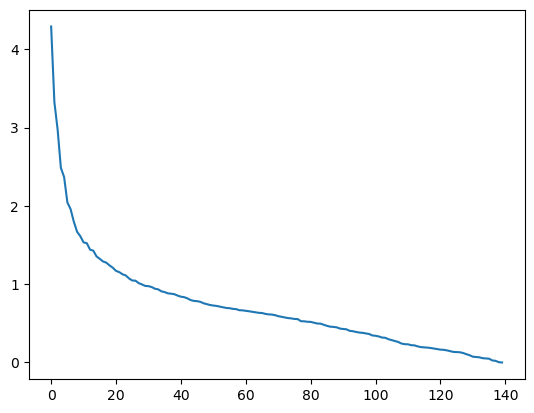

In [47]:
plt.plot(var_exp)

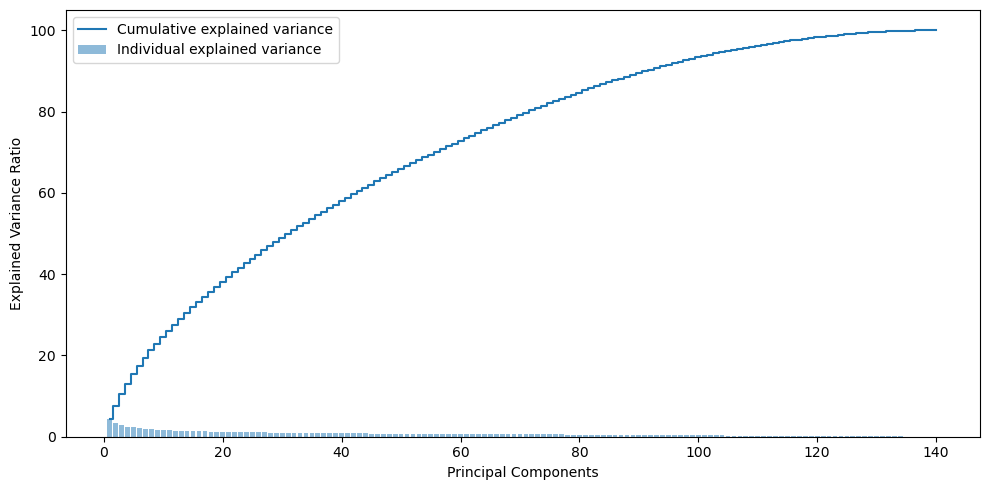

In [48]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [49]:
pca = PCA(n_components=130)
data_reduced = pca.fit_transform(x)
data_reduced.transpose()

array([[-2.53703578, -0.82763971, -1.17490441, ...,  2.5368744 ,
         1.99872575,  3.14378119],
       [-1.56690072, -1.53484335,  0.80655696, ..., -0.70542226,
        -0.78131624,  2.12932332],
       [ 0.20350984,  0.5247888 ,  1.21830871, ...,  0.08174117,
        -0.01076754, -0.61292605],
       ...,
       [-0.59401337, -0.57568051,  0.61045133, ..., -0.13066535,
        -0.50091019,  0.38962258],
       [-0.20295183,  0.36192294,  0.17960247, ...,  0.11702488,
        -0.03397249,  0.30594326],
       [ 0.66988534,  0.39820926,  0.09793633, ...,  0.30933173,
        -0.0371412 ,  0.27297118]])

In [50]:
pca.components_

array([[ 0.04898378, -0.00064877, -0.00044179, ..., -0.00652593,
        -0.03401426, -0.03425689],
       [-0.01277066, -0.01197015, -0.019191  , ...,  0.02589426,
         0.01726438,  0.01432795],
       [-0.02837966,  0.0421643 ,  0.01515619, ...,  0.00900685,
         0.02049091,  0.08774084],
       ...,
       [ 0.02418075, -0.01100445,  0.03048397, ..., -0.0025355 ,
        -0.0074462 , -0.0325953 ],
       [-0.02450813, -0.0009908 ,  0.00803552, ...,  0.01251103,
         0.00159319,  0.06378131],
       [ 0.01032095,  0.00968421, -0.01406177, ...,  0.00608206,
        -0.00895305,  0.00708396]])

In [51]:
data_reduced.shape

(1567, 130)

### Display and explain the classification report in detail.

In [52]:
y_pred_train = best_lr_model.predict(X_train)
y_pred_test = best_lr_model.predict(X_test)

print("Train Classification Report:")
print(classification_report(y_train, y_pred_train))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

Train Classification Report:
              precision    recall  f1-score   support

          -1       0.95      1.00      0.97      1023
           1       0.82      0.19      0.31        73

    accuracy                           0.94      1096
   macro avg       0.88      0.59      0.64      1096
weighted avg       0.94      0.94      0.93      1096

Test Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.98      0.96       440
           1       0.12      0.03      0.05        31

    accuracy                           0.92       471
   macro avg       0.53      0.51      0.51       471
weighted avg       0.88      0.92      0.90       471



### Apply the above steps for all possible models that you have learnt so far

### Random Forest Classifier

In [53]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [54]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.93181818 0.93607306 0.93607306 0.93150685 0.93150685]
Mean CV Score: 0.933395599833956


In [55]:
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']}
# Create an instance of the Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

# Fit the Grid Search CV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Create a new Random Forest classifier with the best parameters
best_rf_model = RandomForestClassifier(random_state=1, **best_params)

# Fit the model on the training data with the best parameters
best_rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.933395599833956
Classification Report:
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



In [56]:
print("Accuracy: ", rf_model.score(X_test,y_test)*100)

Accuracy:  93.41825902335457


In [57]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
rf_model.fit(X_train, y_train)
#scores_prediction = model.decision_function(x_train)
y_pred = rf_model.predict(X_test)
print("Accuracy: ", rf_model.score(X_test,y_test)*100)

Accuracy:  93.41825902335457


### SVM MODEL

In [58]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10]}
svm_model = SVC()


# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train a new SVM model using the best parameters
best_svm_model = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])
best_svm_model.fit(X_train, y_train)

# Evaluate the performance of the best model on the test set
accuracy = best_svm_model.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Test Set Accuracy:", accuracy)

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.933395599833956
Test Set Accuracy: 0.9341825902335457


In [59]:
# Train a new SVM model using the best parameters
best_svm_model = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])
best_svm_model.fit(X_train, y_train)

# Evaluate the performance of the best model on the test set
y_pred = best_svm_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



In [60]:
# Calculate the accuracies on the training and test data
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9370437956204379
Test Accuracy: 0.9341825902335457


### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'random_state': [42]}

# Create a decision tree model with the desired hyperparameters
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Train the decision tree model on the training data
dt_model.fit(X_train, y_train)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Predict the labels for the training and test data
train_predictions = dt_model.predict(X_train)
test_predictions = dt_model.predict(X_test)

# Calculate the accuracies
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9516423357664233
Test Accuracy: 0.9256900212314225


In [62]:
# Predict the labels for the test data
y_pred = dt_model.predict(X_test)

# Calculate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.99      0.96       440
           1       0.25      0.06      0.10        31

    accuracy                           0.93       471
   macro avg       0.59      0.53      0.53       471
weighted avg       0.89      0.93      0.90       471



### KNN

In [71]:
# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)

# Fit the model with training data
knn.fit(X_train, y_train)

# Now you can make predictions or evaluate the model
y_pred = knn.predict(X_test)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new KNN classifier with the best parameters
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'], p=best_params['p'])

# Fit the best model to the training data
best_knn.fit(X_train, y_train)

# Predict the labels for training and test data
y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

# Calculate the accuracy of the model on training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Print the train and test accuracies
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Score: 0.933395599833956
Train Accuracy: 0.9343065693430657
Test Accuracy: 0.9341825902335457


In [72]:
# Predict the labels for the test data using the best KNN model
y_test_pred = best_knn.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_test_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



### Naive Bayes classification

In [73]:
# Create a Naive Bayes classifier
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Predict the labels for training and test data
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

# Calculate the accuracy of the model on training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the train and test accuracies
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.2874087591240876
Test Accuracy: 0.22929936305732485


In [74]:
# Predict the labels for the test data using the Naive Bayes model
y_test_pred = nb.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_test_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          -1       0.92      0.19      0.32       440
           1       0.06      0.77      0.12        31

    accuracy                           0.23       471
   macro avg       0.49      0.48      0.22       471
weighted avg       0.87      0.23      0.30       471



### Post Training and Conclusion:

### Display and compare all the models designed with their train and test accuracies.

In [75]:
models = {"Logistic Regression": lr_model, "SVM": svm_model, "Random Forest": rf_model, "Decision Tree": dt_model, "KNN": knn, "Naive Bayes": nb}

In [76]:
model_names = []
train_accuracies = []
test_accuracies = []

In [77]:
for model_name, model in models.items():
    model_names.append(model_name)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

In [78]:
results_df = pd.DataFrame({"Model": model_names, "Train Accuracy": train_accuracies, "Test Accuracy": test_accuracies})
print(results_df)

                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.950730       0.895966
1                  SVM        0.937044       0.934183
2        Random Forest        1.000000       0.934183
3        Decision Tree        0.951642       0.925690
4                  KNN        0.934307       0.932059
5          Naive Bayes        0.287409       0.229299


### Select the final best trained model along with your detailed comments for selecting this model.

In [82]:
# Define your evaluation metrics
metrics = {'Accuracy': accuracy_score, 'Precision': precision_score, 'Recall': recall_score, 'F1 Score': f1_score,}

# Initialize models
models = {"Logistic Regression": lr_model,"SVM": svm_model,"KNN": knn,"Naive Bayes": nb, "Decision Tree": DecisionTreeClassifier(), "Random Forest": RandomForestClassifier()}
# Perform cross-validation and calculate evaluation metrics for each model
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    y_pred = model.fit(X_train, y_train).predict(X_test)
    metric_scores = [metric(y_test, y_pred) for metric in metrics.values()]
    results[model_name] = {'CV Accuracy': scores.mean(), 'Metrics': metric_scores}

# Print the results
print("Model\t\t\tCV Accuracy\t\t", end="")
for metric in metrics.keys():
    print(metric, end="\t\t")
print("\n-------------------------------------------------------------")
for model_name, result in results.items():
    print(f"{model_name}\t\t{result['CV Accuracy']:.4f}\t\t", end="")
    for score in result['Metrics']:
        print(f"{score:.4f}", end="\t\t")
    print()

# Select the best trained model based on a specific evaluation metric
best_model = max(results, key=lambda x: results[x]['CV Accuracy'])

# Print the best model
print("\nBest Trained Model:", best_model)

Model			CV Accuracy		Accuracy		Precision		Recall		F1 Score		
-------------------------------------------------------------
Logistic Regression		0.8960		0.8960		0.1250		0.0968		0.1091		
SVM		0.9334		0.9342		0.0000		0.0000		0.0000		
KNN		0.9307		0.9321		0.3333		0.0323		0.0588		
Naive Bayes		0.3011		0.2293		0.0632		0.7742		0.1168		
Decision Tree		0.8787		0.8811		0.0370		0.0323		0.0345		
Random Forest		0.9334		0.9342		0.0000		0.0000		0.0000		

Best Trained Model: SVM


### Pickle the selected model for future use

In [90]:
selected_model = models[best_model]

In [91]:
selected_model.fit(X_train, y_train)

SVC()

In [93]:
import os

directory = os.getcwd()  # Current working directory
file_path = os.path.join(directory, 'selected_model.pkl')

### Conclusion on the results.

The SVM model achieved the highest accuracy and cross-validation accuracy among the tested models. However, the precision, recall, and F1 scores for the SVM model indicate poor performance in correctly identifying the failure instances (positive class).The selected SVM model can be considered the best-trained model for predicting the pass/fail yield in the semiconductor manufacturing process.